In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

ff1.Cache.enable_cache('cache')

In [2]:
year = 2022
circuit = 'Canada'
session = 'FP3'
# Load the session data
race = ff1.get_session(year, circuit, session)
laps = race.load_laps(with_telemetry=True)

utils          INFO 	Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils          INFO 	NumExpr defaulting to 8 threads.
C:\Users\btram\anaconda3\lib\site-packages\fastf1\core.py:1096: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Canadian Grand Prix - Practice 3 [v2.2.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timi

In [3]:
lapTimes = laps[['DriverNumber','LapStartTime','Time','PitOutTime','PitInTime','Compound', 'FreshTyre']]
lapstartlist = []
laptimelist = []

ltt = laps["LapTime"].tolist()
laptimesgood = []
for x in ltt:
    y = str(x)
    y = y[11:17]
    laptimesgood.append(y)

lst = lapTimes["LapStartTime"].tolist()
t = lapTimes["Time"].tolist()
pit = lapTimes["PitInTime"].tolist()
pot = lapTimes["PitOutTime"].tolist()

for x in range(len(lst)):
    if str(pot[x]) == "NaT":
        lapstart = lst[x].total_seconds()/60
    else:
        lapstart = pot[x].total_seconds()/60
    if str(pit[x]) == "NaT":
        lapend = t[x].total_seconds()/60
    else:
        lapend = pit[x].total_seconds()/60

    laptime = lapend-lapstart
    lapstartlist.append(lapstart)
    laptimelist.append(laptime)


In [4]:
firstlapstart = 99999
for x in range(len(lapstartlist)):
    if str(lapstartlist[x])!='nan':
        if firstlapstart>lapstartlist[x]:
            firstlapstart=lapstartlist[x]
for x in range(len(lapstartlist)):
    lapstartlist[x]=lapstartlist[x]-firstlapstart

In [5]:
gooddf = lapTimes

del gooddf["LapStartTime"]
del gooddf["Time"]
del gooddf["PitInTime"]
del gooddf["PitOutTime"]
gooddf["StartTimes"] = lapstartlist
gooddf["LapTimes"] = laptimelist
gooddf["LTPretty"] = laptimesgood


<ipython-input-5-085a212d8f63>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gooddf["StartTimes"] = lapstartlist
<ipython-input-5-085a212d8f63>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gooddf["LapTimes"] = laptimelist
<ipython-input-5-085a212d8f63>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [6]:
comp = gooddf["Compound"].tolist()
ft = gooddf["FreshTyre"].tolist()
for x in range(len(ft)):
    if str(comp[x])=='nan':
        comp[x]="UNKNOWN"
    if ft[x]:
        ft[x]="True"
    else:
        ft[x]="False"


In [8]:
compft = []
for x in range(len(ft)):
    y = comp[x]+'_'+ft[x]
    compft.append(y)

gooddf["Compound_Freshness"] = compft

<ipython-input-8-fe173fc6aa9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gooddf["Compound_Freshness"] = compft


In [9]:
compound_colors = {
    'SOFT_True': '#FF3333',
    'MEDIUM_True': '#FFF200',
    'HARD_True': '#EBEBEB',
    'INTERMEDIATE_True': '#39B54A',
    'WET_True': '#00AEEF',
    'UNKNOWN_True': '#555555',
    'SOFT_False': '#762525',
    'MEDIUM_False': '#7c7600',
    'HARD_False': '#999999',
    'INTERMEDIATE_False': '#2b8737',
    'WET_False': '#0078a5',
    'UNKNOWN_False': '#555555',
    'TEST_UNKNOWN_False': '#555555',
    'TEST_UNKNOWN_True': '#555555'
}

In [10]:
drivers_to_visualize = ['6','23','18','5','47','20','22','10','24','77','14','31','3','4','44','63','55','16','11','1']

In [11]:
prettylaps = []
for driver in drivers_to_visualize:
    laps = gooddf.loc[gooddf['DriverNumber'] == driver]
    x = laps['LTPretty'].tolist()
    for lap in x:
        prettylaps.append(lap)

In [12]:
laptimepretty = []
for x in laptimelist:
    z,y = divmod(x,1)
    y = (60*y)/100
    y = round(y,5)
    ltp = y+z
    laptimepretty.append(ltp)


category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
category       INFO 	Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbe

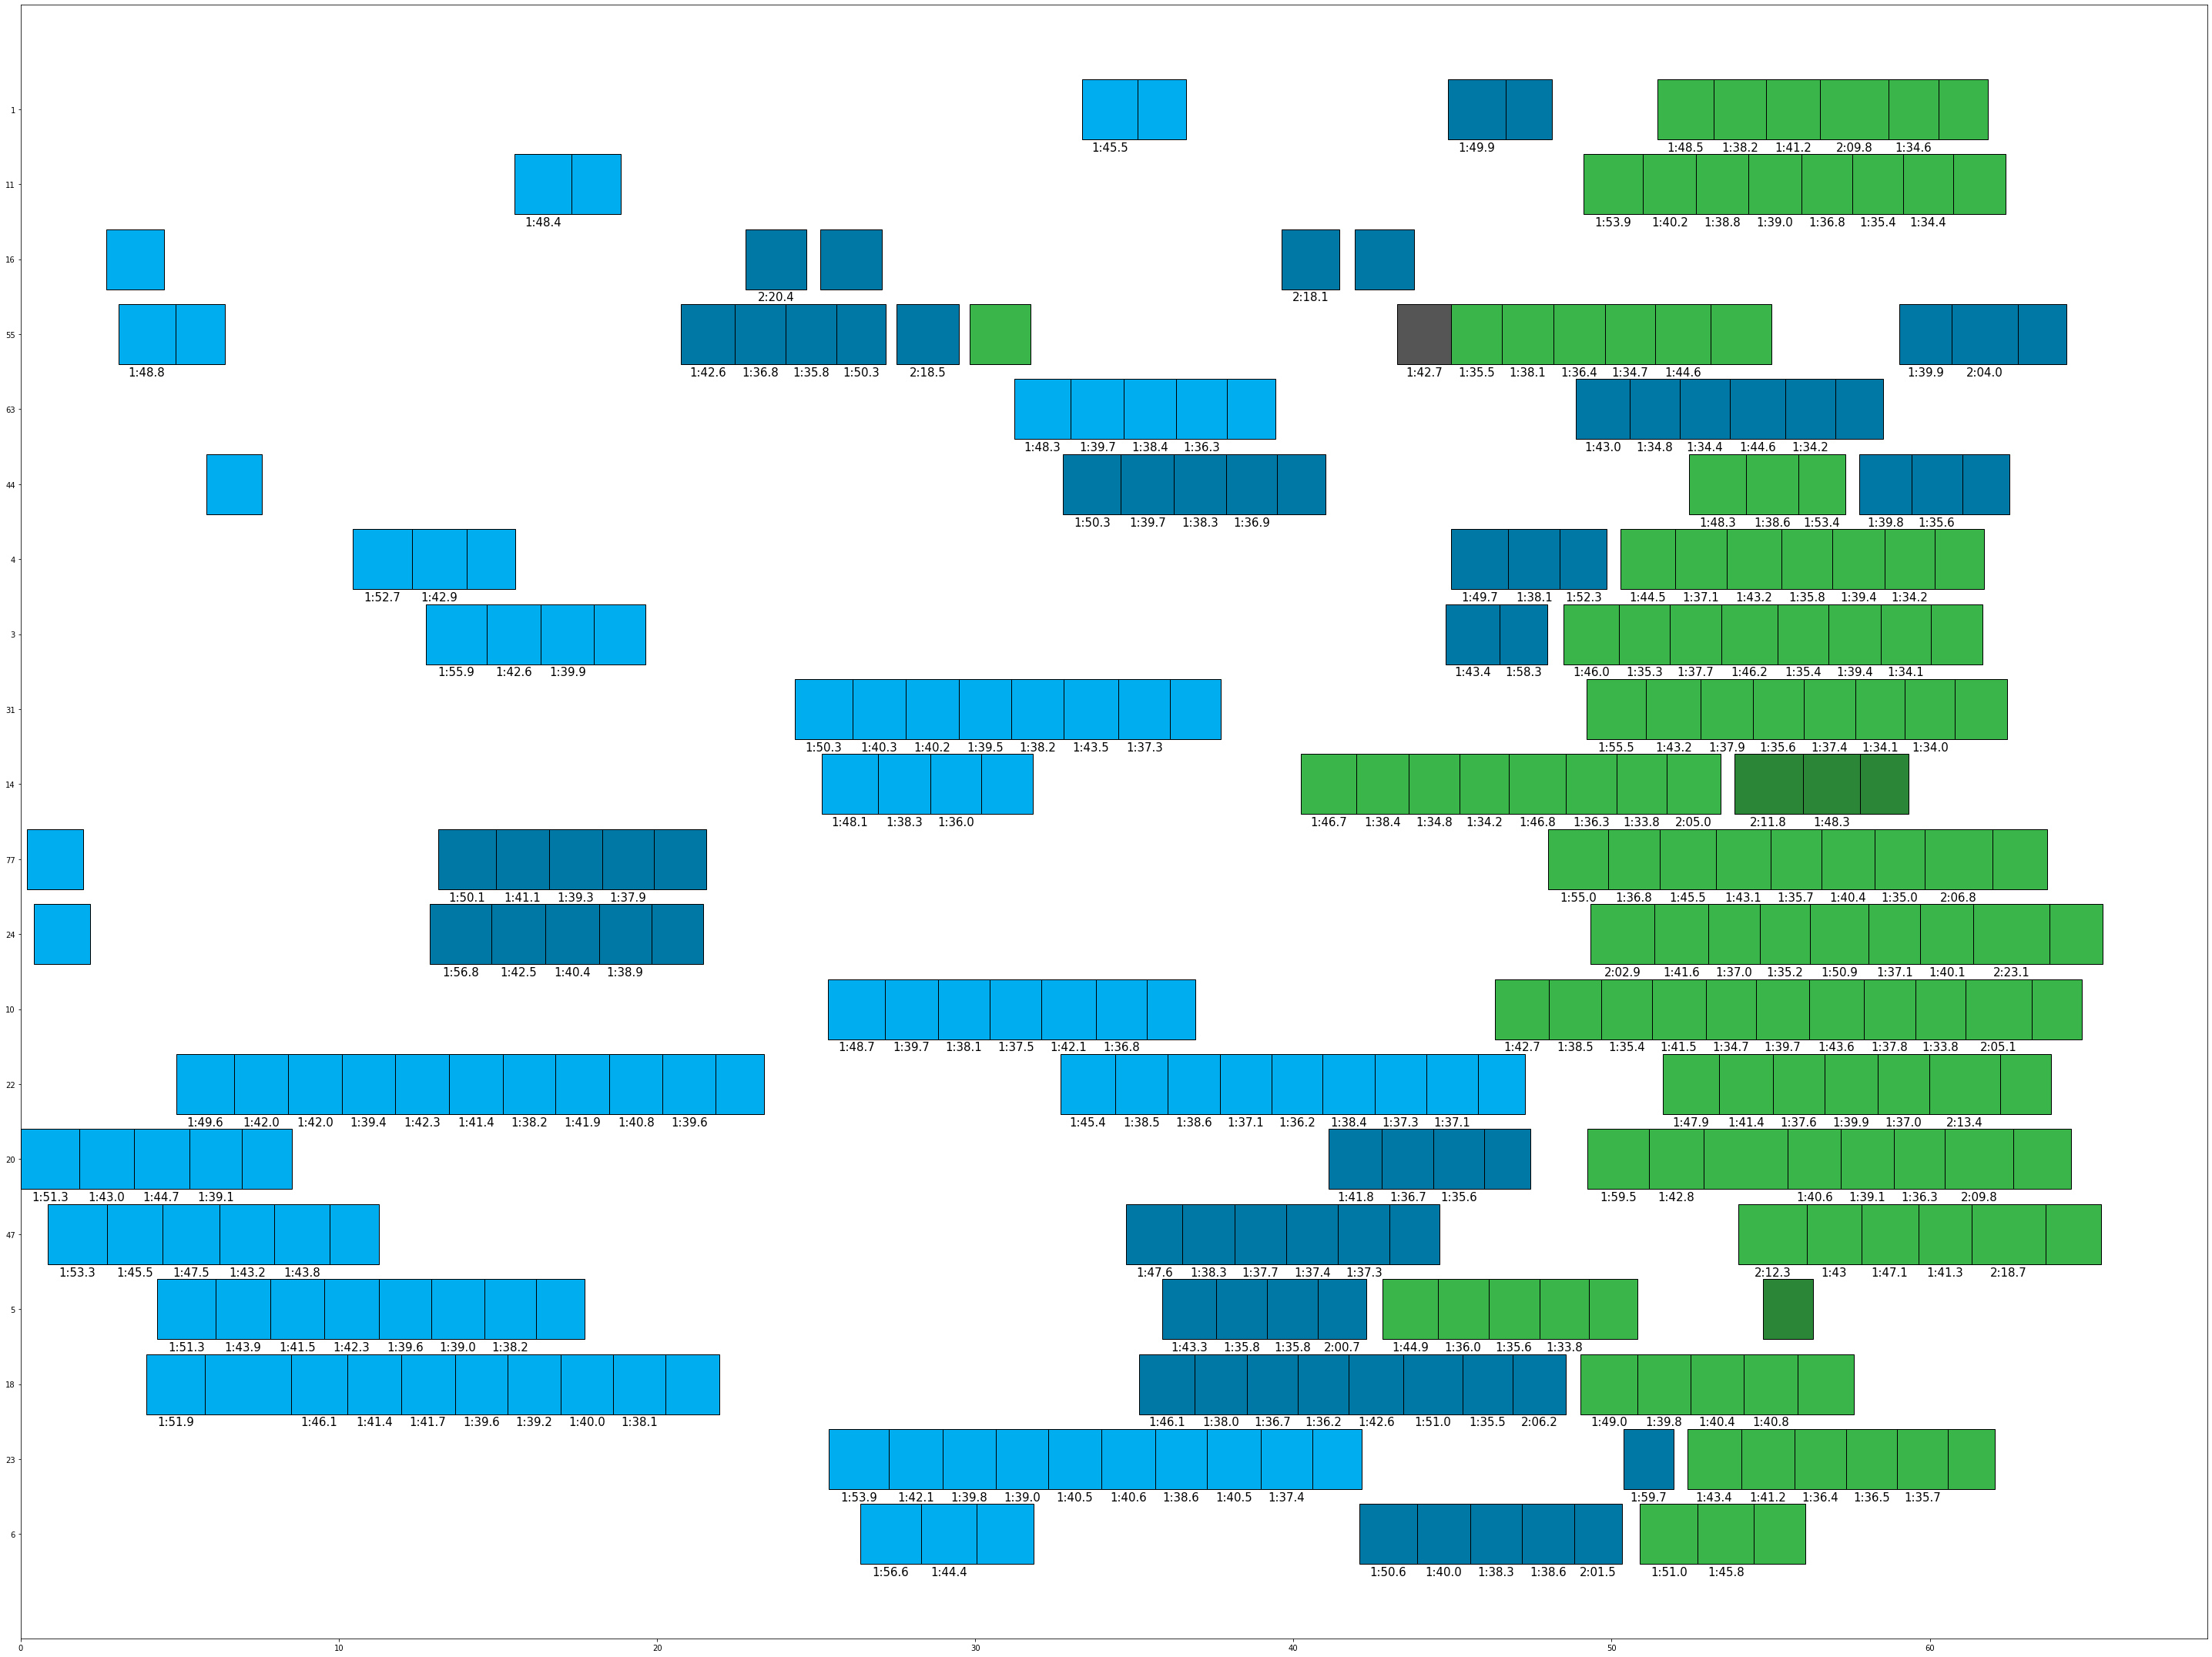

In [13]:
#drivers_to_visualize = ['1','11','4','3','6','23','27','18','10','22','14','31','24','77','47','20','63','44','55','16']
plt.rcParams["figure.figsize"] = [40,30]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
for driver in drivers_to_visualize:
    laps = gooddf.loc[gooddf['DriverNumber'] == driver]
    previous_stint_end = gooddf['StartTimes']
    for _, lap in laps.iterrows():
            
        plt.barh([driver],lap['LapTimes'],left = lap['StartTimes'], 
                 color = compound_colors[lap['Compound_Freshness']],
                 edgecolor = "black")

for bar, time in zip(ax.patches,prettylaps):
    ax.text((2*bar.get_x()+bar.get_width())/2 ,bar.get_y()-0.185, time,ha="center", va="bottom",fontsize=15)

fig.patch.set_facecolor('white')